# Converting text to features with 

1. One Hot Encoding
2. CountVectorizer
3. N-grams
4. Co-occurence matrix
5. Hash Vectorizer
6. Tfidf
7. Word Embedding
8. FastText

In [1]:
# 1. One hot encoding
import pandas as pd
import numpy as np

In [2]:
text = 'I am liking NLP and I can surely try NLP'

In [3]:
pd.get_dummies(text.split())

,I,NLP,am,and,can,liking,surely,try
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0


In [38]:
# 2. CountVectorizer
text = ["The quick brown fox jumped over the lazy dog",
"The dog",
"The fox"]

In [54]:
text = "The quick brown fox jumped over the lazy dog. The dog. The fox"

In [2]:
from nltk import sent_tokenize

In [56]:
sentences = sent_tokenize(text)

In [57]:
sentences

['The quick brown fox jumped over the lazy dog.', 'The dog.', 'The fox']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
cv = CountVectorizer()
cv.fit(sentences)

CountVectorizer()

In [63]:
cv_vect = cv.transform(sentences)

In [64]:
vect = cv_vect.toarray()

In [65]:
cv.vocabulary_

{'the': 7,
 'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumped': 3,
 'over': 5,
 'lazy': 4,
 'dog': 1}

In [66]:
vect

array([[1, 1, 1, 1, 1, 1, 1, 2],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [67]:
d = dict(sorted(cv.vocabulary_.items(),key=lambda x:x[1]))
d

{'brown': 0,
 'dog': 1,
 'fox': 2,
 'jumped': 3,
 'lazy': 4,
 'over': 5,
 'quick': 6,
 'the': 7}

In [68]:
d.keys()

dict_keys(['brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the'])

In [69]:
pd.DataFrame(vect, columns=d.keys())

,brown,dog,fox,jumped,lazy,over,quick,the
0,1,1,1,1,1,1,1,2
1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1


In [45]:
# 3. N-Grams

In [52]:
cv = CountVectorizer(ngram_range=(2,2))

In [53]:
cv.fit(text)

CountVectorizer(ngram_range=(2, 2))

In [54]:
cv.vocabulary_

{'love nlp': 3,
 'nlp and': 4,
 'and will': 0,
 'will learn': 6,
 'learn nlp': 2,
 'nlp in': 5,
 'in 2month': 1}

In [59]:
# 4. Generating Co-occurence matrix - Dropped

In [73]:
# 5. Hash Vectorizer - Cannot do inverse_transform

In [61]:
from sklearn.feature_extraction.text import HashingVectorizer

In [69]:
hv = HashingVectorizer(n_features=10)

In [70]:
text = ['The quick brown fox jumps over the lazy dog.']

In [71]:
hv.fit(text)

HashingVectorizer(n_features=10)

In [72]:
hv.transform(text).toarray()

array([[ 0.        ,  0.57735027,  0.        , -0.57735027,  0.        ,
         0.        ,  0.        ,  0.        , -0.57735027,  0.        ]])

In [74]:
# 6. Tfidf

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tfidf = TfidfVectorizer()

In [77]:
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

In [78]:
tfidf.fit(text)

TfidfVectorizer()

In [80]:
tfidf.transform(text).toarray()

array([[0.36388646, 0.27674503, 0.27674503, 0.36388646, 0.36388646,
        0.36388646, 0.36388646, 0.42983441],
       [0.        , 0.78980693, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61335554],
       [0.        , 0.        , 0.78980693, 0.        , 0.        ,
        0.        , 0.        , 0.61335554]])

In [83]:
tfidf.vocabulary_

{'the': 7,
 'quick': 6,
 'brown': 0,
 'fox': 2,
 'jumped': 3,
 'over': 5,
 'lazy': 4,
 'dog': 1}

# Word Embeddings

Why ?<br>
To solve advanced problems, maintaing context, semantic relation within text is necessary.<br>
Traditional methods fail but word embeddings can handle this.

In [3]:
import re

In [88]:
# Word to vec - developed by google

In [89]:
# CBOW - predicting middle word from surrounding words
# skip gram - predicting ssurrounding words from middle word

In [98]:
# Train own w2v model in gensim

In [99]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             ['nlp', 'saves', 'time', 'and', 'solves','lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

In [78]:
text = '''Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.[1][2][3]

Deep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.[4][5][6]

Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various differences from biological brains. Specifically, neural networks tend to be static and symbolic, while the biological brain of most living organisms is dynamic (plastic) and analog.[7][8][9]

The adjective "deep" in deep learning comes from the use of multiple layers in the network. Early work showed that a linear perceptron cannot be a universal classifier, and then that a network with a nonpolynomial activation function with one hidden layer of unbounded width can on the other hand so be. Deep learning is a modern variation which is concerned with an unbounded number of layers of bounded size, which permits practical application and optimized implementation, while retaining theoretical universality under mild conditions. In deep learning the layers are also permitted to be heterogeneous and to deviate widely from biologically informed connectionist models, for the sake of efficiency, trainability and understandability, whence the "structured" part.'''

In [79]:
from nltk import sent_tokenize, word_tokenize

In [80]:
sentences = sent_tokenize(text)
sentences

['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning.',
 'Learning can be supervised, semi-supervised or unsupervised.',
 '[1][2][3]\n\nDeep learning architectures such as deep neural networks, deep belief networks, recurrent neural networks and convolutional neural networks have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.',
 '[4][5][6]\n\nArtificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems.',
 'ANNs have various differences from biological brains.',
 'S

In [91]:
sentences = [re.sub(r'[^a-zA-Z]', ' ', sentence) for sentence in sentences]
sentences = [re.sub(r'[^\w\s]+', ' ', sentence) for sentence in sentences]
sentences = [sentence.lower().strip() for sentence in sentences]

In [94]:
sentences = [word_tokenize(sentence) for sentence in sentences]

In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform([' '.join(sents) for sents in sentences])

In [146]:
len([' '.join(sents) for sents in sentences])

10

In [152]:
features

<10x160 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

In [151]:
np.mean(features,axis=1).shape

(10, 1)

In [145]:
from sklearn.linear_model import LogisticRegression

In [153]:
logreg = LogisticRegression().fit(np.mean(features,axis=1),range(10))

In [155]:
logreg.predict(np.mean(features,axis=1))

array([1, 1, 2, 1, 1, 2, 1, 2, 2, 2])

In [95]:
#!pip install gensim # install in anaconda prompt with admin previleges

In [156]:
import gensim
from gensim.models import Word2Vec

In [97]:
skipgram = Word2Vec(sentences, size=50, window=3, min_count=1, sg=1)

In [99]:
skipgram.wv['deep']

array([-0.0019984 ,  0.0091366 , -0.00405003,  0.0086572 ,  0.00561426,
       -0.00659363,  0.00027947, -0.00691484, -0.00254999, -0.00928493,
        0.00541202, -0.00327147,  0.00057903,  0.00355049, -0.00813138,
       -0.00851671,  0.00736637, -0.00108749, -0.00145964,  0.00781181,
       -0.00912837, -0.0056041 ,  0.00657357,  0.0066149 , -0.00374712,
       -0.00562431, -0.00371615, -0.0073811 ,  0.00303935, -0.00778023,
       -0.00241441, -0.00896674,  0.00320505,  0.00438208,  0.00861528,
       -0.00241417, -0.00815311, -0.00833598, -0.00435926, -0.0099499 ,
        0.00831741,  0.00924948,  0.00269892, -0.00171741,  0.0013508 ,
        0.00251637,  0.00957732, -0.00955931, -0.00771066,  0.00382691],
      dtype=float32)

In [100]:
# Saving and loading trained models

In [118]:
skipgram.save('skipgram.bin')

In [119]:
skipgram = Word2Vec.load('skipgram.bin')

In [120]:
# Visualizing w2v

In [101]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [102]:
X = skipgram.wv[skipgram.wv.vocab]

In [103]:
X.shape

(161, 50)

In [169]:
X = np.array([model[word] for word in 'I like Deep Learning very much i think i am in love with deep learning'.split()])

In [170]:
X.shape

(15, 300)

In [180]:
pca = PCA(n_components=3)

In [181]:
result = pca.fit_transform(X)

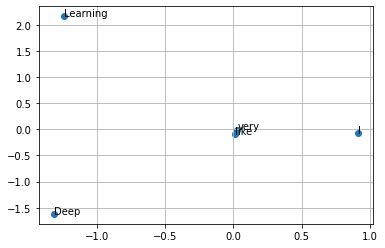

In [176]:
plt.scatter(result[:,0][:5],result[:,1][:5])
words = 'I like Deep Learning very much i think i am in love with deep learning'.split()[:5]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.grid(True)
plt.show()

In [107]:
from mpl_toolkits import mplot3d

In [178]:
m = result

IndexError: index 2 is out of bounds for axis 1 with size 2

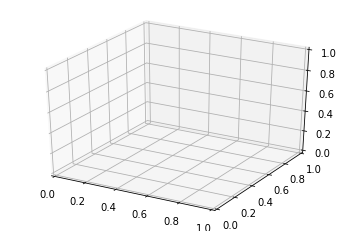

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,j in zip(range(len(m))[:20],words[:20]): # plot each point + it's index as text above
    x = m[i,0]
    y = m[i,1]
    z = m[i,2]
    label = j
    ax.scatter(x, y, z)
    ax.text(x, y, z, '%s' % (label))

In [ ]:
X = 

In [160]:
pca = PCA(n_components=2)

result = pca.fit_transform(X)

plt.scatter(result[:,0][:20],result[:,1][:20])
words = skipgram.wv.vocab[:20]
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.grid(True)
plt.show()

from mpl_toolkits import mplot3d

m = result

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,j in zip(range(len(m))[:20],words[:20]): # plot each point + it's index as text above
    x = m[i,0]
    y = m[i,1]
    z = m[i,2]
    label = j
    ax.scatter(x, y, z, cmap='greens')
    ax.text(x, y, z, '%s' % (label))

<ipython-input-160-d6d209dfa5a3>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  X = model[model.wv.vocab]


KeyboardInterrupt: 

In [141]:
# Train CBOW model has exact same steps and just single change: sg = 0 for cbow

# Loading pretrained word2vec model by google

In [1]:
import gensim

In [2]:
path = r'E:\\GoogleNews-vectors-negative300.bin'

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)

In [9]:
del model

# Text classification using word2vec

# Calculating Word Similarity

In [148]:
model.similarity('this','is')

0.40797037

# Finding Odd Man out

In [162]:
model.doesnt_match(' breakfast lunch dinner milk'.split())

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'milk'

# Finding relations within text

In [167]:
model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

# FastText

In [168]:
from gensim.models import FastText

In [170]:
fasttext = FastText(sentences, size=50, window=3, min_count=1) 

In [172]:
fasttext.wv['nlp']

array([-9.0070546e-04, -9.3143818e-04, -9.7308178e-03, -5.0290260e-03,
       -5.1291438e-04, -5.6098453e-03,  2.3439988e-03, -3.9568052e-04,
       -8.8404585e-03,  4.3116249e-03, -7.9903984e-03,  2.6018827e-03,
        5.9620887e-03, -2.2254144e-03,  2.0288110e-03,  3.1596918e-03,
       -3.7521299e-03,  3.0934329e-03, -1.1692590e-03, -1.0236575e-02,
       -1.0991067e-03,  6.8359268e-03,  1.1396845e-03,  2.7968097e-03,
       -7.0846797e-04, -2.2392513e-03,  5.6535951e-03,  9.5187816e-06,
       -4.1877134e-03, -3.2712163e-03, -4.6040160e-03,  1.1728714e-03,
        2.1075297e-03,  3.9611743e-03, -5.1013073e-03,  3.4164509e-03,
        2.4364436e-04,  4.6315482e-03, -3.9007266e-03, -4.9772495e-03,
        8.2772719e-03,  2.8603901e-03, -4.0932624e-03,  1.1480048e-03,
        2.1066661e-03, -2.7983356e-04,  4.2486503e-03,  2.9264246e-03,
        8.1736445e-03, -7.6125603e-04], dtype=float32)

In [173]:
# Rest same as w2v

In [6]:
path = r'E:\wiki-news-300d-1M-subword.vec'

In [22]:
from gensim.models import FastText
import numpy as np

In [17]:
from tqdm import tqdm

In [20]:
embeddings_index = {}
f = open(path, encoding='utf-8')

In [ ]:
for line in tqdm(f):
    values = line.strip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

366299it [00:49, 7366.90it/s]